In [21]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math
import scipy.fft as fft

In [22]:
sampling = 0.1

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 80

x = np.arange(-5, 5, sampling)

In [23]:
order = 5#magnitude of window
wc = 2   #cut-off frequency
def butterWorth(w):
    return 1/(1+(w/wc)**(2*order))

In [24]:
def FFT(data):
    return fft.fft(data, len(data))
def iFFT(data):
    return fft.ifft(data)

#get axis to plot FT on
def getFreqAxis(x):
    samplingFreq = 1/sampling
    return np.arange(-samplingFreq/2, samplingFreq/2, samplingFreq/len(x))

#plots fft of incoming data in frequency space
def plotFFT(x, ft, color = 'red'):
    #rearrange fourier transform data before drawing it
    tmp = np.split(ft, 2)
    fs = np.concatenate([tmp[1], tmp[0]])
    
    freqAxis = getFreqAxis(x)
    
    plt.plot(freqAxis, np.abs(fs), color = color)    

In [25]:
#apply givven filter to given FT
#data - array float, size [N]
#filt - array float, size [N]
def applyFilter(data, filt):
    tmp = np.split(data, 2)
    fs = np.concatenate([tmp[1], tmp[0]])
    fs = fs*filt
    tmp = np.split(fs, 2)
    return np.concatenate([tmp[1], tmp[0]])

In [26]:
def testButterworthFilter(x, data):
    fftOfData = FFT(data)
    filteredFFT = applyFilter(fftOfData, np.vectorize(butterWorth)(x))
    
    plt.subplot(211)
    plotFFT(x, fftOfData, color = 'blue')                               #direct FT of sin with high freq. noise
    plotFFT(x, filteredFFT, color = 'red')                              #filtered sin function
    plt.plot(x, np.vectorize(butterWorth)(x)*np.amax(np.abs(fftOfData)))#let's scale filter function and show it
    
    inverseFft = iFFT(fftOfData)    #try to retrive original function from FT
    inverseFftF = iFFT(filteredFFT)#same but for filtered FT
    
    plt.subplot(212)
    plt.plot(x, np.real(inverseFft), color = 'green')
    plt.plot(x, np.real(inverseFftF), color = 'red') #filtered sin - no noise

In [27]:
data = 0.3*np.sin(20*x)+np.sin(x) #sin(x) with sin(20*x) as high freq. noise

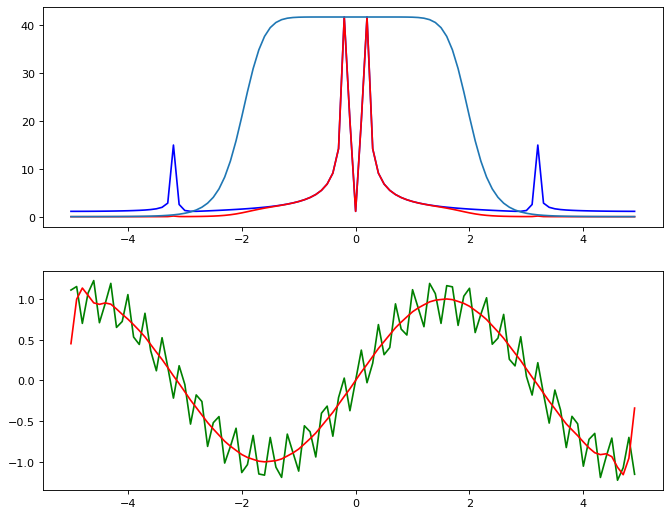

In [28]:
testButterworthFilter(x, data)
#green is original
#red is filtered

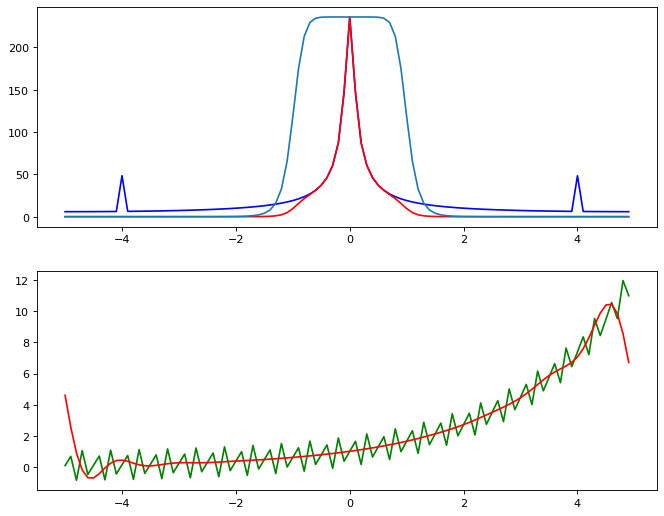

In [29]:
wc = 1
data = np.exp(x/2)+np.sin(4*2*np.pi*x)
testButterworthFilter(x, data)